In [1]:
#preprocessing tools
import pandas as pd
import numpy as np
import re

#EDA Tools
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Importing the Data

In [2]:
raw_Data = pd.read_csv('Index2018.csv')

In [3]:
data = raw_Data.copy()

In [4]:
data.shape

(6269, 5)

## Examining Data

In [5]:
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [6]:
data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
data.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the data

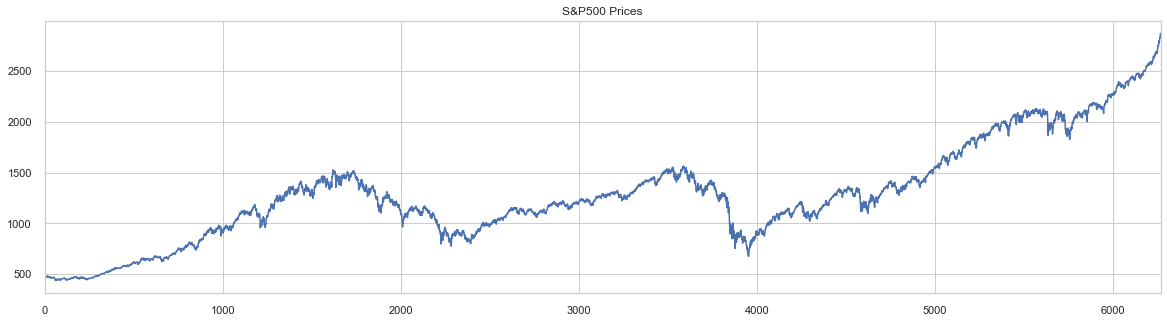

In [8]:
data.spx.plot(figsize=(20,5),title = 'S&P500 Prices')

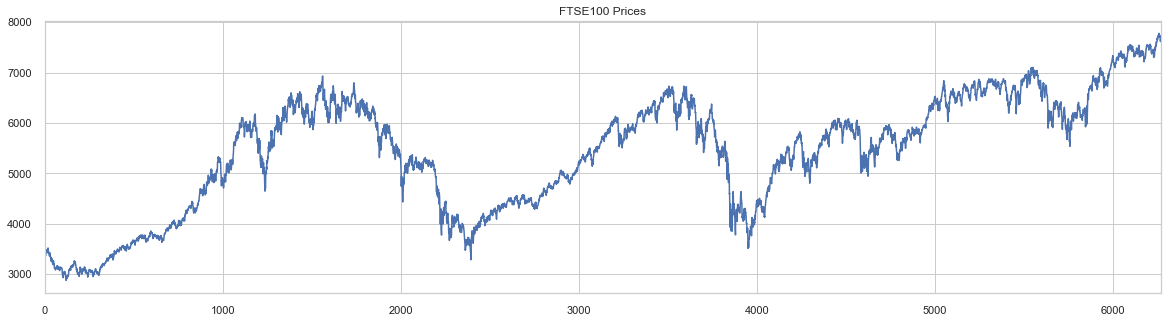

In [9]:
data.ftse.plot(figsize=(20,5),title = 'FTSE100 Prices')

Text(0.5, 1.0, 'S&P vs FTSE')

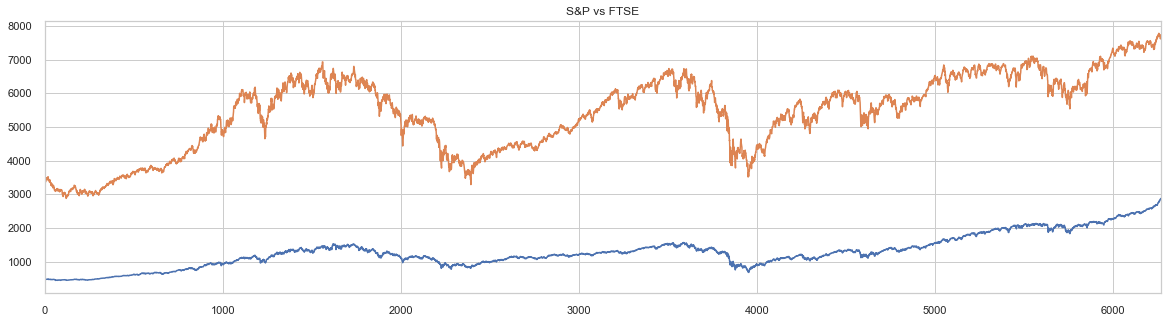

In [10]:
data.spx.plot(figsize=(20,5),title = 'S&P500 Prices')
data.ftse.plot(figsize=(20,5),title = 'FTSE100 Prices')
plt.title('S&P vs FTSE')

## Thie QQ Plots

##### Quantile-Qunatile Plot(QQ Plot)
##### used to determine whether a data is distributed a cretain way
##### usually showcases how the data fits a Normal distribution

In [11]:
import scipy.stats
import pylab

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 438.92    ,  441.49    ,  441.96    , ..., 2839.253031,
         2853.528411, 2872.867839])),
 (476.460561028412, 1288.1275420815123, 0.9767273150948816))

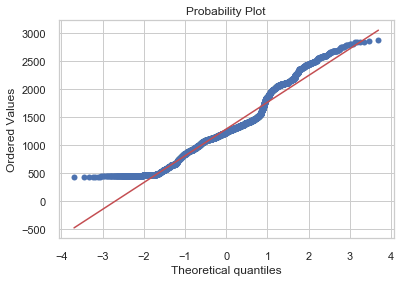

In [13]:
scipy.stats.probplot(data.spx,plot = pylab)

## Length of the time Periods

In [14]:
data['date'].describe()

count           6269
unique          6269
top       26/01/1996
freq               1
Name: date, dtype: object

## From text to date

In [15]:
data['date']=pd.to_datetime(data['date'],dayfirst=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null datetime64[ns]
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


## Setting the index

In [17]:
data.set_index('date',inplace=True)

In [18]:
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


 ###### Once 'date' becomes an index,we no longer save its values as a seperate attribute in the data frame
 ###### data['date'].describe()   

## setting the desired frequency

In [19]:
data = data.asfreq('d')

In [20]:
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [21]:
data.shape

(8789, 4)

In [22]:
data.isna().sum()

spx       2520
dax       2520
ftse      2520
nikkei    2520
dtype: int64

#### To handle only bussiness working days

In [23]:
data = data.asfreq('b')

In [24]:
data

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [25]:
data.shape

(6277, 4)

In [26]:
data.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

## Handling Missing Values

In [27]:
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [28]:
data[data.isnull().any(axis=1)]

,spx,dax,ftse,nikkei
date,,,,
2008-01-01,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN


##### Front Filling : Assigns the values of the previous period.
##### Back Filling : Assigns the values for the next periods
##### Assigning the Same Value : Assign the average to all the missing values within the time series
##### when come to time series best approch to impute the values from the mean

In [29]:
data.spx=data.spx.fillna(method ='ffill')

In [30]:
data.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [31]:
data.ftse=data.ftse.fillna(method ='bfill')

In [32]:
data.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [33]:
data.dax=data.dax.fillna(value = data.dax.mean())

In [34]:
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [35]:
data.nikkei=data.nikkei.fillna(value = data.nikkei.mean())

In [36]:
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplifying the dataset

In [37]:
data['market_values'] = data['spx']

In [38]:
data.describe()

,spx,dax,ftse,nikkei,market_values
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4040.545253,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [39]:
data.drop(columns=['spx','dax','ftse','nikkei'],inplace = True)

In [40]:
data.head()

,market_values
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [41]:
data.describe()

,market_values
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


###### Time Series data relies on keeping the chronological order of the values
###### shuffling is impossible in TS data
###### Training set : From the beginning up to some cut off point
###### Testing set : From the cut off point util the end
###### Reasonable splitting the data train as 80% and test as 20%

In [42]:
size = int(len(data)*0.8)

In [43]:
data_train = data.iloc[:size]

In [44]:
data_test = data.iloc[size:]

In [45]:
data_train.tail()

,market_values
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [46]:
data.head()

,market_values
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## white Noise

In [47]:
###X~N(mean,Standard Deviation)
wn = np.random.normal(loc = data['market_values'].mean(), scale = data['market_values'].std(),size=len(data))

In [48]:
data['wn']=wn

In [49]:
data.describe()

,market_values,wn
count,6277.000000,6277.000000
mean,1288.642547,1280.718149
std,487.868210,484.397935
min,438.920000,-532.262645
25%,992.715221,952.577931
50%,1233.761241,1286.859991
75%,1460.250000,1609.221587
max,2872.867839,3083.674499


Text(0.5, 1.0, 'white noise Time-Series')

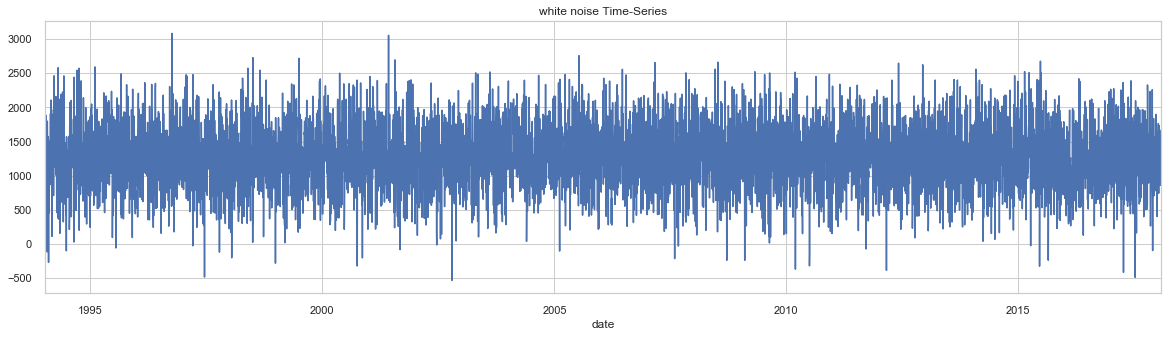

In [50]:
data['wn'].plot(figsize =(20,5))
plt.title('white noise Time-Series')

Text(0.5, 1.0, 'S&P Prices')

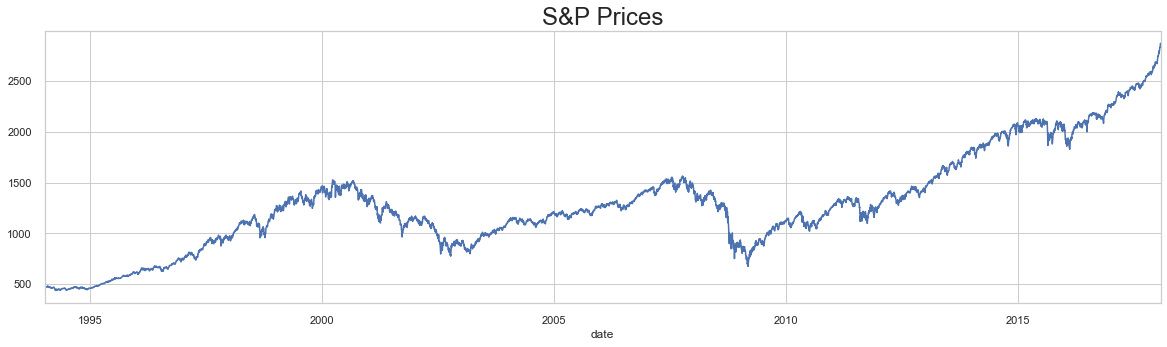

In [51]:
data['market_values'].plot(figsize=(20,5))
plt.title('S&P Prices',size=24)

Text(0.5, 1.0, 'S&P Prices')

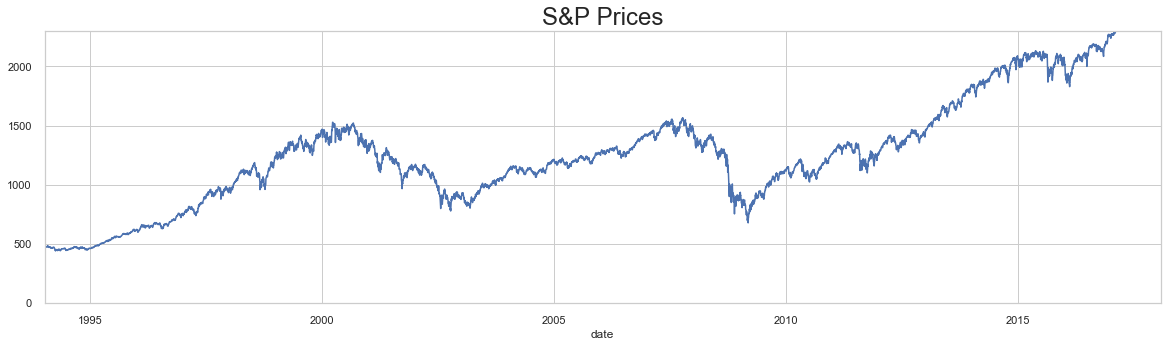

In [52]:
data['market_values'].plot(figsize=(20,5))
plt.ylim(0,2300)
plt.title('S&P Prices',size=24)

In [53]:
data.describe()

,market_values,wn
count,6277.000000,6277.000000
mean,1288.642547,1280.718149
std,487.868210,484.397935
min,438.920000,-532.262645
25%,992.715221,952.577931
50%,1233.761241,1286.859991
75%,1460.250000,1609.221587
max,2872.867839,3083.674499


## Random Walk

In [54]:
rw=pd.read_csv('RandWalk.csv')
rw['date']=pd.to_datetime(rw['date'],dayfirst=True)
rw.set_index('date',inplace=True)

In [55]:
rw = rw.asfreq('b')

In [56]:
rw.shape

(5021, 1)

In [57]:
data['rw']=rw['price']

In [58]:
data

,market_values,wn,rw
date,,,
1994-01-07,469.900000,1024.446023,1122.139662
1994-01-10,475.270000,935.261665,1080.347860
1994-01-11,474.130000,1499.148945,1082.095245
1994-01-12,474.170000,1148.371391,1083.639265
1994-01-13,472.470000,1745.250209,1067.146255
...,...,...,...
2018-01-23,2839.130362,1238.293135,NaN
2018-01-24,2837.544008,1346.056575,NaN
2018-01-25,2839.253031,860.336133,NaN


In [59]:
data.head()

,market_values,wn,rw
date,,,
1994-01-07,469.90,1024.446023,1122.139662
1994-01-10,475.27,935.261665,1080.347860
1994-01-11,474.13,1499.148945,1082.095245
1994-01-12,474.17,1148.371391,1083.639265
1994-01-13,472.47,1745.250209,1067.146255


Text(0.5, 1.0, 'Random Walk')

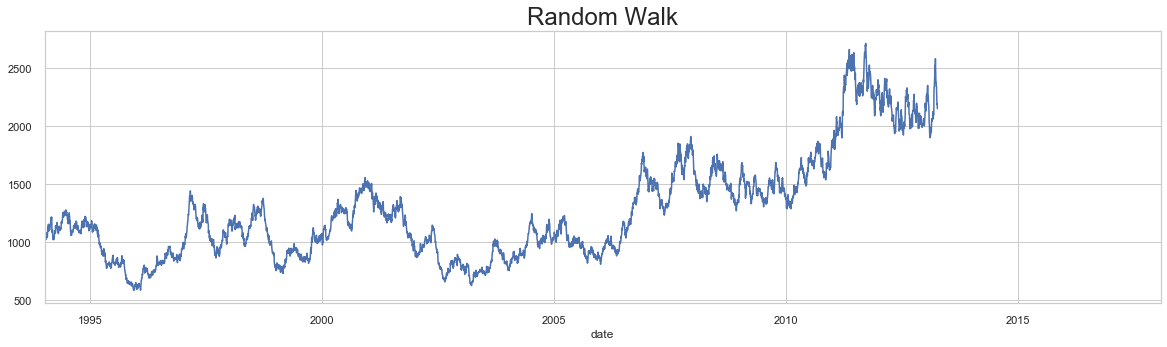

In [60]:
data.rw.plot(figsize=(20,5))
plt.title("Random Walk",size=24)

Text(0.5, 1.0, 'Random Walk and Market values')

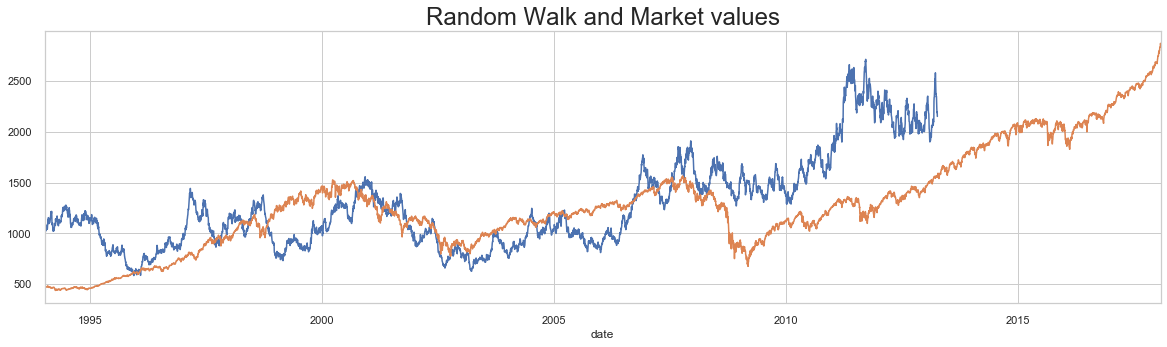

In [61]:
data.rw.plot(figsize=(20,5))
data.market_values.plot()
plt.title("Random Walk and Market values",size=24)

# Stationarity

In [ ]:
## Stationarity M and standard deviation should be constant and no-sesonality

In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:
adfuller(data['market_values'])

(1.1194986381728407,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.20986775002)

In [68]:
adfuller(data['wn'])

(-78.70329611762705,
 0.0,
 0,
 6276,
 {'1%': -3.4313923799633836,
  '5%': -2.862000639842268,
  '10%': -2.567015195598801},
 94903.13154137449)

## Seasonality

## Decomposition Method to check sesonality in the dataset

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

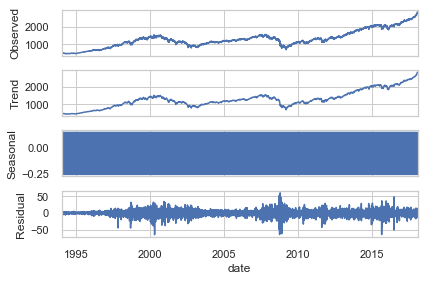

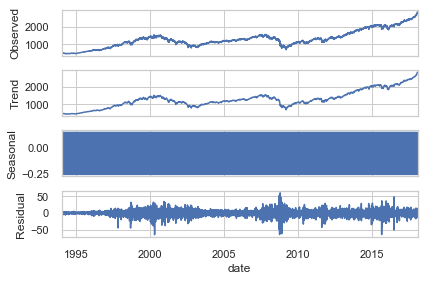

In [78]:
s_dec_additive=seasonal_decompose(data['market_values'],model ="additive")
s_dec_additive.plot()

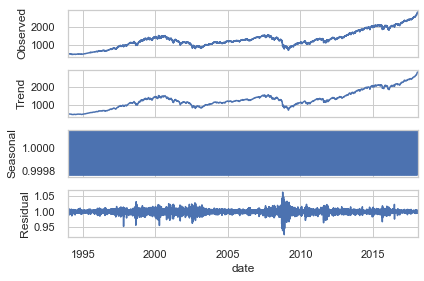

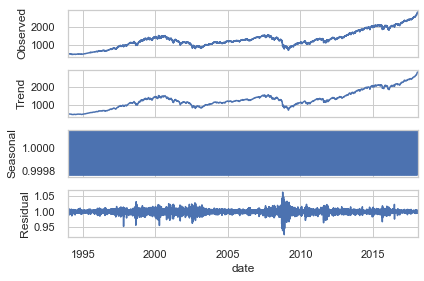

In [79]:
s_dec_additive=seasonal_decompose(data['market_values'],model ="multiplicative")
s_dec_additive.plot()

## ACF

Text(0.5, 1.0, 'ACF S&P')

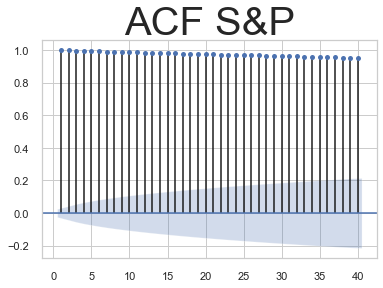

In [86]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['market_values'],lags = 40,zero= False)
plt.title('ACF S&P',size=40)

Text(0.5, 1.0, 'ACF white Noise')

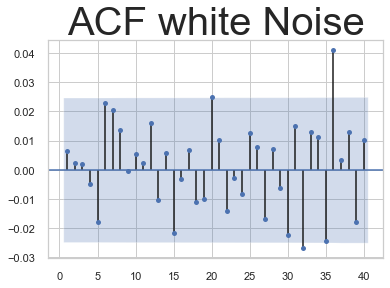

In [87]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['wn'],lags = 40,zero= False)
plt.title('ACF white Noise',size=40)

## PACF

In [92]:
from statsmodels.graphics.tsaplots import plot_pacf

Text(0.5, 1.0, 'PACF S&P')

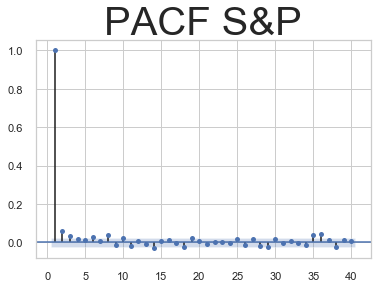

In [90]:
plot_pacf(data['market_values'],lags = 40,zero= False,method=('ols'))
plt.title('PACF S&P',size=40)

Text(0.5, 1.0, 'PACF white Noise')

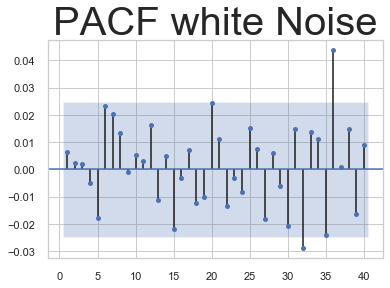

In [91]:
plot_pacf(data['wn'],lags = 40,zero= False,method=('ols'))
plt.title('PACF white Noise',size=40)